# NLP : field of computer science used to process the interaction btw computers and human language
NLP is concerned with giving computers the ability to understand text and spoken words in much the same way human beings can. And with this help we can make highly informed decisions without going through tedious task to read every possible comment we can analyse what's the sentiment of that comment.


NLP use cases:
* Speech recognition
* Part of speech tagging
* Word sense disambiguation
* Named entity recognition
* Sentiment analysis (in this notebook we will understand this use case)
* Natural language generation(structured speech to text)

In this notebook, I will perform EDA on Amazon product review dataset and at the end we will do sentiment analysis using naive bayes and support vector classifier. This notebook can be used as an introductory tutorial on how to deal with textual data followed by predictions on the dataset.  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')

 We import warnings as this is used to remove unwaned warnings as the data set is used is of small size

In [2]:
df=pd.read_csv("/content/data.csv")
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

reviews.didPurchase , reviews.id , reviews.userCity , reviews.userProvince are completely empty so no use of them

In [4]:
data=df.copy()
data.describe()


,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


rating info and review helpful rating is important to analyse data later. Also mean reviews rating comes out to be 4.58

<Axes: >

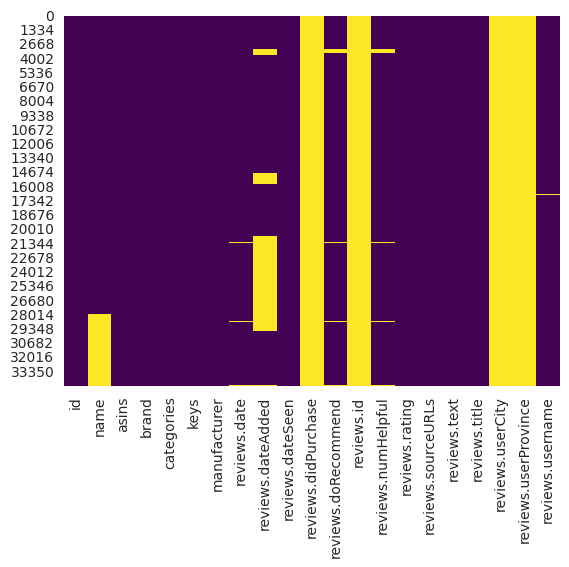

In [5]:
sns.heatmap(df.isnull(),cbar=False,cmap="viridis")

we can remove reviews.userCity, reviews.userProvince, reviews_id

In [6]:
df.drop(['reviews.id'],inplace=True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.numHelpful    34131 non-null  float64
 13  reviews.rating        34627 non-null  float64
 14  reviews.sourceURLs    34660 non-null  object 
 15  reviews.text       

In [7]:
df.drop(['reviews.didPurchase'],inplace =True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.doRecommend   34066 non-null  object 
 11  reviews.numHelpful    34131 non-null  float64
 12  reviews.rating        34627 non-null  float64
 13  reviews.sourceURLs    34660 non-null  object 
 14  reviews.text          34659 non-null  object 
 15  reviews.title      

In [8]:
df.describe()

,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,34131.000000,34627.000000,0.0,0.0
mean,0.630248,4.584573,NaN,NaN
std,13.215775,0.735653,NaN,NaN
min,0.000000,1.000000,NaN,NaN
25%,0.000000,4.000000,NaN,NaN
50%,0.000000,5.000000,NaN,NaN
75%,0.000000,5.000000,NaN,NaN
max,814.000000,5.000000,NaN,NaN


Insights from df.describe . Avg review rating =4.58.
Avg review helpful is 0.6 but with high standard deviation so there are people whose reviews are imp and whose are not imp. Reviews lie btw 0-13 people finding helpful.
Review that was most helful was to 814 people.

In [9]:
# making a copy for eda where we can drop strings and work on numerical values only
data=df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.doRecommend   34066 non-null  object 
 11  reviews.numHelpful    34131 non-null  float64
 12  reviews.rating        34627 non-null  float64
 13  reviews.sourceURLs    34660 non-null  object 
 14  reviews.text          34659 non-null  object 
 15  reviews.title      

In [10]:
print(data['asins'].unique())
asins_unique=len(data['asins'].unique())
print("Number of Unique asins: "+str(asins_unique))

['B01AHB9CN2' 'B00VINDBJK' 'B005PB2T0S' 'B002Y27P3M' 'B01AHB9CYG'
 'B01AHB9C1E' 'B01J2G4VBG' 'B00ZV9PXP2' 'B0083Q04TA' 'B018Y229OU'
 'B00REQKWGA' 'B00IOYAM4I' 'B018T075DC' nan 'B00DU15MU4' 'B018Y225IA'
 'B005PB2T2Q' 'B018Y23MNM' 'B00OQVZDJM' 'B00IOY8XWQ' 'B00LO29KXQ'
 'B00QJDU3KY' 'B018Y22C2Y' 'B01BFIBRIE' 'B01J4ORNHU' 'B018SZT3BK'
 'B00UH4D8G2' 'B018Y22BI4' 'B00TSUGXKE' 'B00L9EPT8O,B01E6AO69U'
 'B018Y23P7K' 'B00X4WHP5E' 'B00QFQRELG' 'B00LW9XOJM' 'B00QL1ZN3G'
 'B0189XYY0Q' 'B01BH83OOM' 'B00BFJAHF8' 'B00U3FPN4U' 'B002Y27P6Y'
 'B006GWO5NE' 'B006GWO5WK']
Number of Unique asins: 42


unique number of asins means number of different type of products. So we have 42 different kinds of products(products asins will be unique but there can be multiple products that fall under similar asins

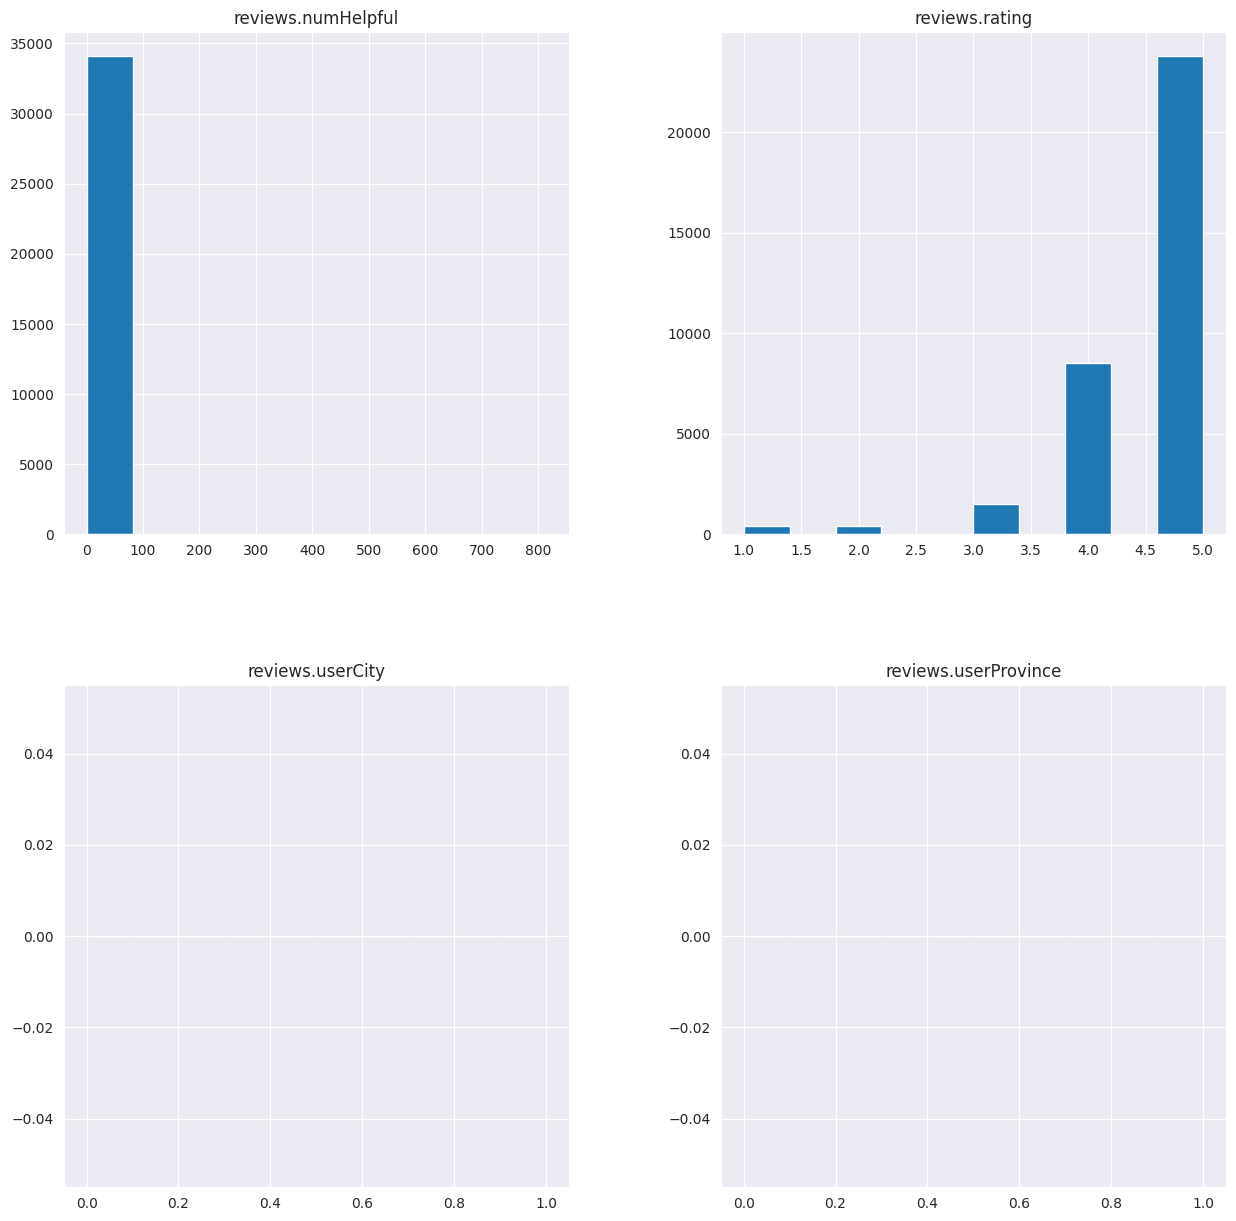

In [11]:
data.hist(figsize=(15,15))
plt.show()

reviews.numHelpful: Outliers in this case are valuable, so we may want to weight reviews that had more than 50+ people who find them helpful. reviews.rating: Majority of examples were rated highly (looking at rating distribution). There is twice amount of 5 star ratings than the others ratings combined so problem arises when we train it with only high rating so it won't give proper result in negative rating. So we use stratified shuffle split

# Train test split with stratified shuffle

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
print("Before {}".format(len(data)))
# now removing all null values from review.rating
data_after=data.dropna(subset=['reviews.rating'])
print("After {}".format(len(data_after)))
data_after['reviews.rating']=data_after['reviews.rating'].astype(int)

Before 34660
After 34627


stratified shuffle split: the data is shuffled everytime after a split which gives us better reach to overall dataset. we use this split when our dataset is too biased to one section so to balance it we shuffle it after every insertion of datapoint. So now no one type of data will be there in training dataset which makes it well trained for differnet datasets

[https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html](http://) More info in this documentation

In [13]:
split=StratifiedShuffleSplit(n_splits=5,test_size=0.2)
for train_index,test_index in split.split(data_after,data_after["reviews.rating"]):
    strat_train=data_after.reindex(train_index)
    strat_test=data_after.reindex(test_index)
strat_train.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
7014,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-11-25T00:00:00.000Z,2017-05-21T01:20:28Z,"2017-04-30T00:08:00.000Z,2017-06-07T08:15:00.000Z",True,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,My son loves his tablet he received for his bi...,Great tablet,NaN,NaN,Deborah
6,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,"Great for e-reading on the go, nice and light ...",great e-reader tablet,NaN,NaN,Droi
28344,AVpfl8cLLJeJML43AE3S,NaN,"B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...","echowhite/263039693056,echowhite/152558276095,...",Amazon,2016-05-06T00:00:00.000Z,NaN,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/5588528/review...,"This device does everything. I get news, jokes...",Much better than siri,NaN,NaN,thejuice
25469,AVpfl8cLLJeJML43AE3S,"Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,","B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...","echowhite/263039693056,echowhite/152558276095,...",Amazon,2017-09-15T00:00:00.000Z,NaN,2017-09-28T00:00:00Z,True,0.0,5.0,http://reviews.bestbuy.com/3545/5588528/review...,Wife and son love the speaker vary user friend...,Awesome sound and vary easy to use,NaN,NaN,Langston
5438,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2015-12-12T00:00:00.000Z,2017-04-03T19:29:33Z,"2017-04-03T02:46:00.000Z,2017-04-30T00:25:00.0...",True,0.0,4.0,http://reviews.bestbuy.com/3545/5025800/review...,For $50 the kindle fire 7 is a bargain. I had ...,Great value,NaN,NaN,Mark


So here we can see that we get randomised row in our training dataset by using stratified shuffle split

In [14]:
len(strat_train)

27701

In [15]:
len(strat_test)

6926

In [16]:
strat_train["reviews.rating"].value_counts()/len(strat_train)
# this is to get percentage of each of the ratings

reviews.rating
5.0    0.686076
4.0    0.246886
3.0    0.043284
2.0    0.011516
1.0    0.011444
Name: count, dtype: float64

In [17]:
strat_test["reviews.rating"].value_counts()/len(strat_test)
# this is to get percentage of each of the ratings in testing data

reviews.rating
5.0    0.686255
4.0    0.245308
3.0    0.043026
1.0    0.011984
2.0    0.011839
Name: count, dtype: float64

so stratified shuffle split helps in giving more appropriate answers as what if it is arranged in some way that 1* max rating comes in strat_train . so it helps in avg in out

# Exploratory Data Exploration(training set)

In [18]:
reviews=strat_train.copy()
reviews.head(2)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
7014,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-11-25T00:00:00.000Z,2017-05-21T01:20:28Z,"2017-04-30T00:08:00.000Z,2017-06-07T08:15:00.000Z",True,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,My son loves his tablet he received for his bi...,Great tablet,NaN,NaN,Deborah
6,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,"Great for e-reading on the go, nice and light ...",great e-reader tablet,NaN,NaN,Droi


In [19]:
len(reviews['name'].unique()),len(reviews['asins'].unique())

(47, 35)

so we have 35 products in training data ASINs but more product names 48. so we have **one to many relationship** btw asins and names. A single asin can have different name due to different seller

In [20]:
# so its better to group by on the basis of asins
reviews.groupby('asins')['name'].unique()

asins
B005PB2T0S               [Amazon Kindle Lighted Leather Cover,,,\r\nAma...
B005PB2T2Q               [Fire Kids Edition Tablet, 7 Display, Wi-Fi, 1...
B00IOY8XWQ               [Kindle Paperwhite E-reader - White, 6 High-Re...
B00IOYAM4I               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00L9EPT8O,B01E6AO69U    [nan, Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,, ...
B00LO29KXQ               [Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include...
B00LW9XOJM                                                           [nan]
B00OQVZDJM               [Amazon Kindle Paperwhite - eBook reader - 4 G...
B00QFQRELG                                                           [nan]
B00QJDU3KY               [Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include...
B00QL1ZN3G                                                           [nan]
B00REQKWGA               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00TSUGXKE                            [Echo (White),,,\r\nEcho (White),,,]
B00U3FPN4U         

we are concerned with product ratings and reviews so we take care of asins only

In [21]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27701 entries, 7014 to 34428
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    27679 non-null  object 
 1   name                  22284 non-null  object 
 2   asins                 27678 non-null  object 
 3   brand                 27679 non-null  object 
 4   categories            27679 non-null  object 
 5   keys                  27679 non-null  object 
 6   manufacturer          27679 non-null  object 
 7   reviews.date          27660 non-null  object 
 8   reviews.dateAdded     19260 non-null  object 
 9   reviews.dateSeen      27679 non-null  object 
 10  reviews.doRecommend   27256 non-null  object 
 11  reviews.numHelpful    27306 non-null  float64
 12  reviews.rating        27679 non-null  float64
 13  reviews.sourceURLs    27679 non-null  object 
 14  reviews.text          27678 non-null  object 
 15  reviews.title        

# Asins/Names with ratings

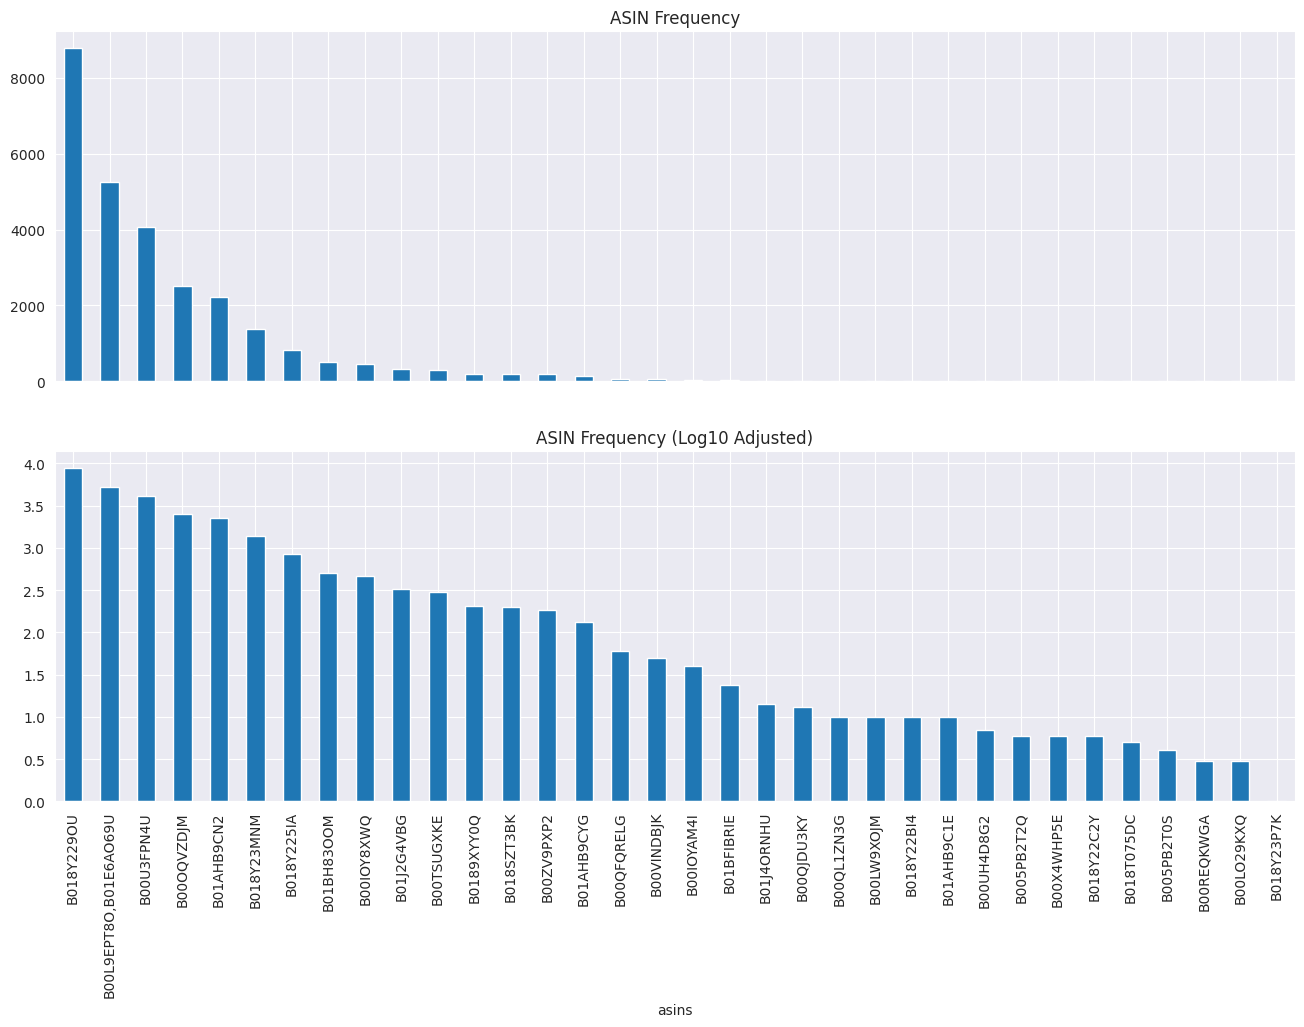

In [22]:
fig = plt.figure(figsize=(16,10))
# we use subplot when we have to see interrelationship btw two graphs
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2, sharex = ax1)
reviews["asins"].value_counts().plot(kind="bar", ax=ax1, title="ASIN Frequency")
# The ax (or Axes object) is the area of the figure where your data appears
np.log10(reviews["asins"].value_counts()).plot(kind="bar", ax=ax2,
                                               title="ASIN Frequency (Log10 Adjusted)")
# np.log10 normalises our data to visualise the graph and difference much better
plt.show()

so we know that what asins have max number of people rating . And this answers which asins have most sales

# ASINS/Reviews

In [23]:
reviews['reviews.rating'].mean()
# trianing data set rating mean

4.585895444199574

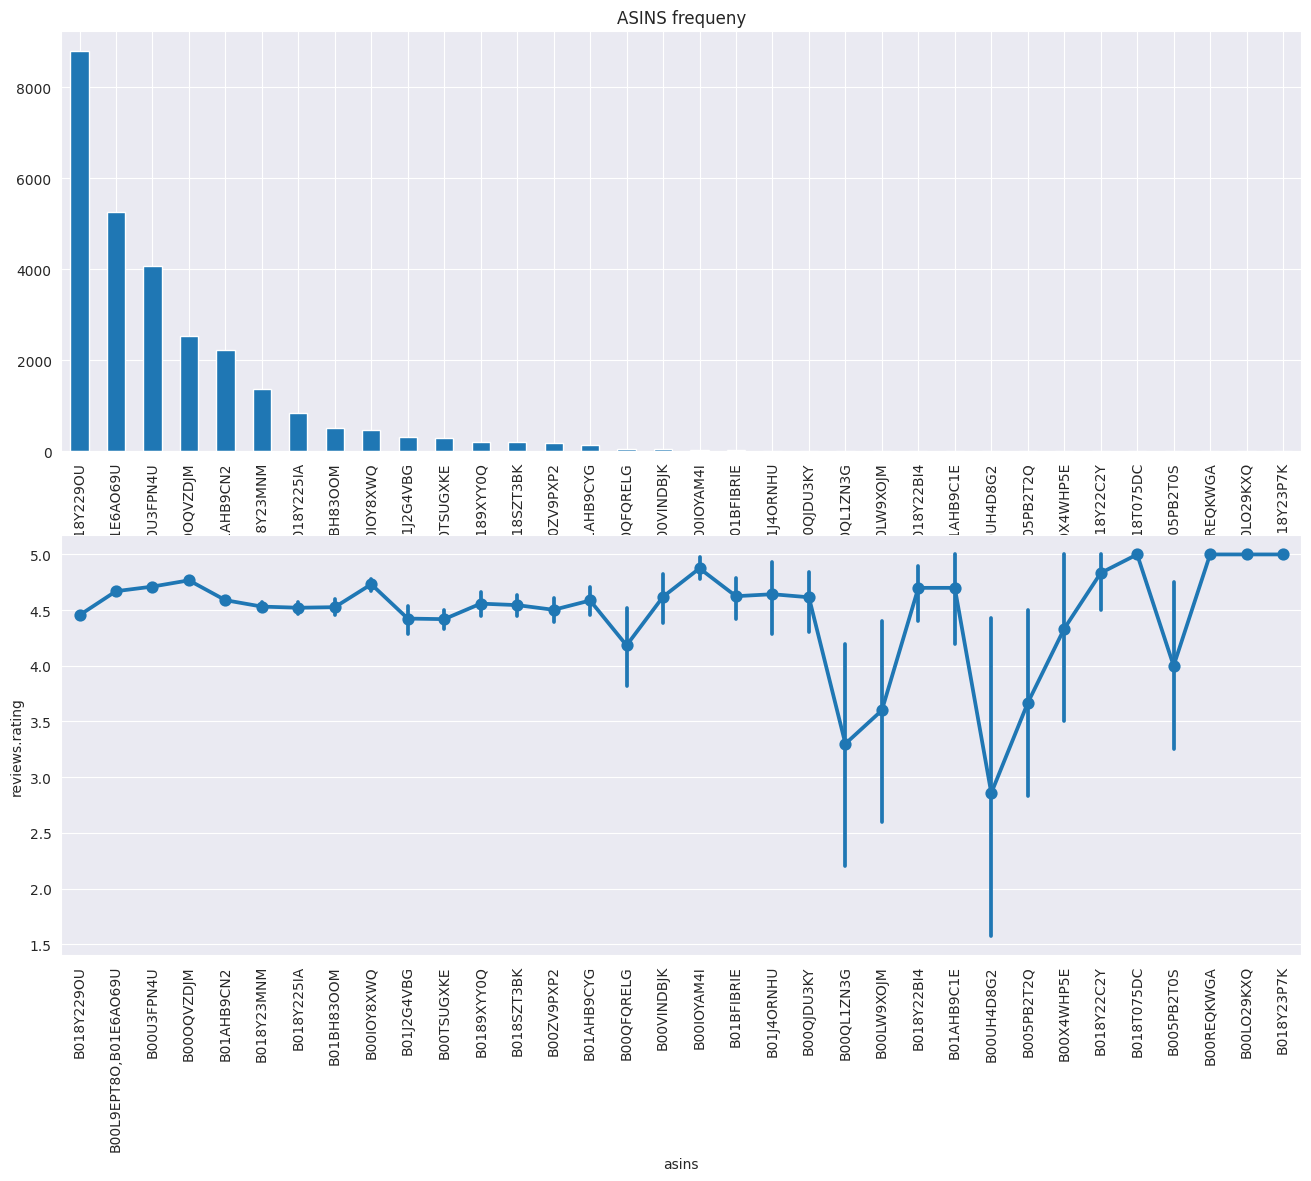

In [24]:
# now we will use pointplot to see our number of those people giving ratings
asins_count=reviews['asins'].value_counts().index
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews['asins'].value_counts().plot(kind="bar",title="ASINS frequeny")
plt.subplot(2,1,2)
sns.pointplot(x="asins",y="reviews.rating",order=asins_count,data=reviews)
plt.xticks(rotation=90)
plt.show()

so we have info about rating of product and no. of reviews given on that asin.Here dots are means and lines extremes show max min rating value.So now we can do analysis of products quality using no. of users

# reviews.doRecommend/ASINs

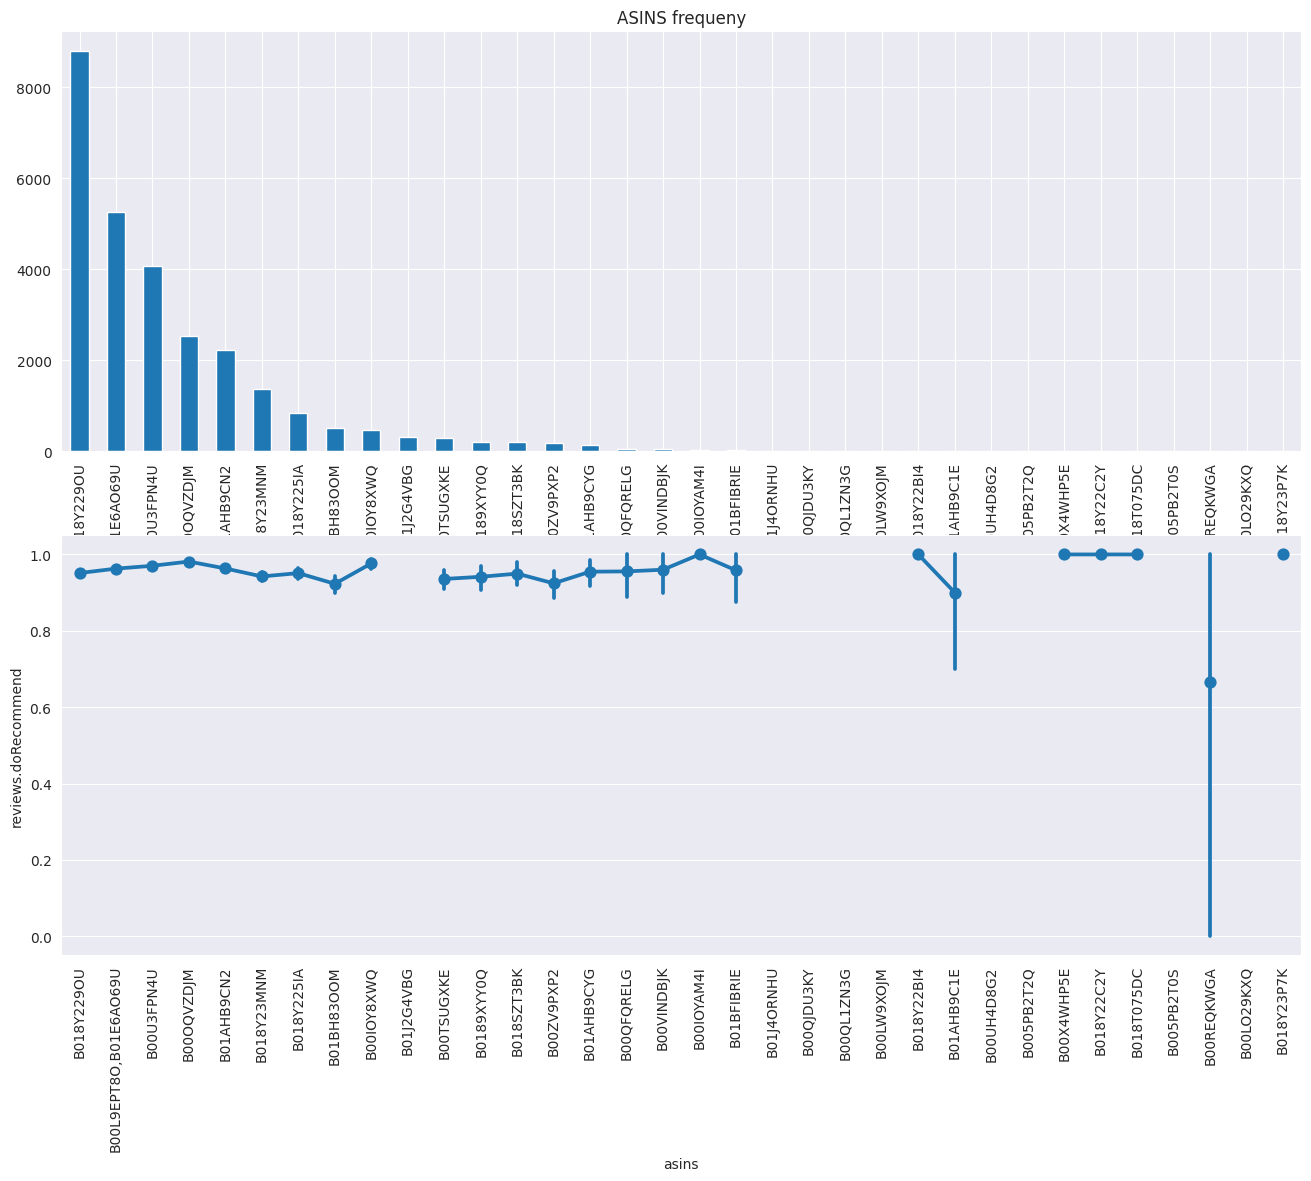

In [25]:
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews['asins'].value_counts().plot(kind="bar",title="ASINS frequeny")
plt.subplot(2,1,2)
sns.pointplot(x="asins",y="reviews.doRecommend",order=asins_count,data=reviews)
plt.xticks(rotation=90)
plt.show()

Info about which product is more frequently recommended and if its sold more or not based on that recommendation

# Correlations

In [27]:
counts=reviews['asins'].value_counts().to_frame()
avg_rating=reviews.groupby("asins")['reviews.rating'].mean().to_frame()
avg_rating

,reviews.rating
asins,
B005PB2T0S,4.000000
B005PB2T2Q,3.666667
B00IOY8XWQ,4.732334
B00IOYAM4I,4.875000
"B00L9EPT8O,B01E6AO69U",4.669840
B00LO29KXQ,5.000000
B00LW9XOJM,3.600000
B00OQVZDJM,4.767525
B00QFQRELG,4.183333


Id's and mean of the product belonging to that id

In [29]:
table=avg_rating.join(counts)
table

,reviews.rating,count
asins,,
B005PB2T0S,4.000000,4
B005PB2T2Q,3.666667,6
B00IOY8XWQ,4.732334,467
B00IOYAM4I,4.875000,40
"B00L9EPT8O,B01E6AO69U",4.669840,5252
B00LO29KXQ,5.000000,3
B00LW9XOJM,3.600000,10
B00OQVZDJM,4.767525,2525
B00QFQRELG,4.183333,60


ValueError: x and y must be the same size

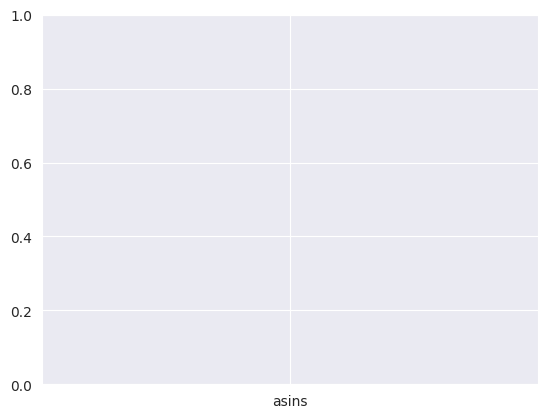

In [30]:
plt.scatter("asins","reviews.rating",data=table)
table.corr()

# Sentiment Analysis

In [31]:
def sentiments(rating):
    if(rating==5)or(rating==4):
        return "Positive"
    elif rating==3:
        return "Neutral"
    elif(rating==2)or(rating==1):
        return "Negative"


In [32]:
# now adding this sentiments function to training and testing dataset
strat_train['Sentiments']=strat_train['reviews.rating'].apply(sentiments)
strat_test['Sentiments']=strat_test['reviews.rating'].apply(sentiments)
# strat_train.head()
strat_train["Sentiments"][:20]

7014     Positive
6        Positive
28344    Positive
25469    Positive
5438     Positive
1104     Positive
29083    Positive
9635     Positive
20378    Positive
9510     Positive
17430    Positive
2007     Positive
21220    Positive
12529    Positive
23425    Positive
30924    Positive
27859    Positive
11390    Negative
25657    Positive
23952    Positive
Name: Sentiments, dtype: object

# Preparing text data

In [33]:
x_train=strat_train['reviews.text']
x_train_targetsentiment=strat_train['Sentiments']
x_test=strat_test['reviews.text']
x_test_targetsentiment=strat_test['Sentiments']
print(len(x_train),len(x_test))

27701 6926


# Extracting features

In [34]:
# tokenisation: which breaks sentences into words
# stopwords: filtering unwanted words like the ,are etc.
# filling na with space
x_train=x_train.fillna(' ')
x_test=x_test.fillna(' ')
x_train_targetsentiment=x_train_targetsentiment.fillna(' ')
x_test_targetsentiment=x_test_targetsentiment.fillna(' ')

In [35]:
# Text preprocessing and occurence counting using count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer()
x_train_counts=count_vect.fit_transform(x_train)
x_train_counts.shape

(27701, 12533)

here we have 27k samples and 12k distinct words

In [36]:
from sklearn.feature_extraction.text import TfidfTransformer
tfid_transformer=TfidfTransformer(use_idf=False)
x_train_tfid=tfid_transformer.fit_transform(x_train_counts)
x_train_tfid.shape


(27701, 12533)

so tfidf transformer reduces less meaning words which have higher occurence . So it divides the number of occurences for each word by total number of words. Downscales stop words like "the" "are" etc.

In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
clf_multiNB_pipe=Pipeline([('vect',CountVectorizer()),
                               ("tfidf",TfidfTransformer()),
                               ("clf_nominalNB",MultinomialNB())])
clf_multiNB_pipe.fit(x_train,x_train_targetsentiment)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_nominalNB', MultinomialNB())])

**we use pipeline from sklearn when we want a number of tasks to be implemented on every datapoint. It can also be used when we want to implement multiple models on dataset in sequential manner**

In [38]:
predict_multiNB=clf_multiNB_pipe.predict(x_test)
predict_multiNB

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype='<U8')

In [39]:
from sklearn.metrics import accuracy_score
print("Accuracy: {}".format(accuracy_score(x_test_targetsentiment,predict_multiNB)))

Accuracy: 0.9314178457984407


We have attained accuracy of 94% on our testing data .

In [40]:
x_test

8088     An Amazon fire tablet for $50!? Need I say mor...
9188     Great tablet for the price. It is very clear t...
22494    I'm super impressed with Alexa and how easy it...
16681    Kid friendly Great appsChild can learn many th...
12704    Works okay for what we paid. Not super speedy,...
                               ...                        
31923    This thing lets you watch practically anything...
28060    Great speaker. Pretty loud. I like it that con...
20139    Got this for my mother in law and she loves it...
19147    Great battery life. However it is slow to resp...
6484     I haven't put my Fire Tablet down since I got ...
Name: reviews.text, Length: 6926, dtype: object

# Applying model on input text

In [41]:
from sklearn.svm import LinearSVC
clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer()),
                               ("tfidf", TfidfTransformer()),
                               ("clf_linearSVC", LinearSVC())])
clf_linearSVC_pipe.fit(x_train, x_train_targetsentiment)

predictedLinearSVC = clf_linearSVC_pipe.predict(x_test)
print('Accuracy: {}'. format(accuracy_score(x_test_targetsentiment,
                             predictedLinearSVC)))

Accuracy: 0.9361825007219174


In [42]:
new_text=["the tablet is good , really liked it",
         "the tablet is ok,it's working",
         "The tablet is not good, does not work waste"]
clf_linearSVC_pipe.predict(new_text)

array(['Positive', 'Neutral', 'Negative'], dtype=object)

So Here we conclude our Notebook on NLP using Naive Bayes and SVC and did EDA on dataset. Hope you like it. ****Please share your feedback on the notebook if any improvements can be done.. Also please do upvote if you like it ****

# THANK YOU!!!